In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import joblib
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.datasets import load_iris


In [3]:
# Loading the dataset
Iris=load_iris()
# Creating a dataframe
df=pd.DataFrame(Iris.data,columns=Iris.feature_names)
# Adding target column
df['Species']=Iris.target
# Adding target names
df['Species']=df['Species'].map({i:name for i,name in enumerate(Iris.target_names)})
# Displaying the dataframe
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  Species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


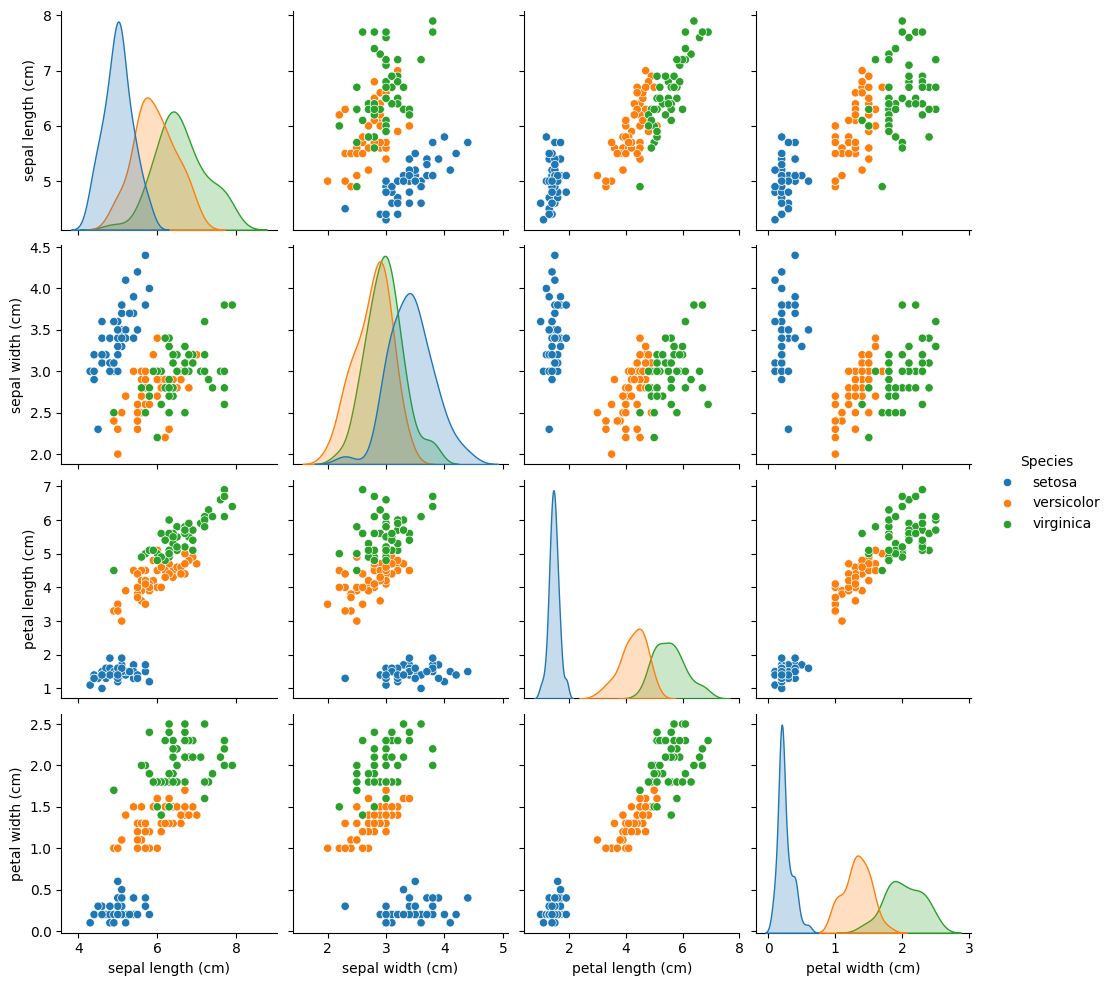

In [4]:
sns.pairplot(df,hue='Species')
plt.show()

In [ ]:

from sklearn.discriminant_analysis import StandardScaler

# Dropping the target column
x=df.drop('Species',axis=1)
# Creating a target column
y=df['Species']
# Splitting the dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
X_train_unscaled = x_train.copy()
# scaling
scaller=StandardScaler()
x_train=scaller.fit_transform(x_train)
x_test=scaller.transform(x_test)


In [13]:
# Creating a model
model=LogisticRegression(max_iter=1000)
# Fitting the model
model.fit(x_train,y_train)


LogisticRegression(max_iter=1000)

In [16]:
# Predicting
y_pred=model.predict(x_test)
# Displaying
print("Predicted Data:",y_pred)
# Accuracy
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:", accuracy)
# Confusion matrix
print("Confusion Matrix:",confusion_matrix(y_test,y_pred))
# Classification report
print("Classification Report:",classification_report(y_test,y_pred))


Predicted Data: [np.str_('setosa') np.str_('virginica') np.str_('versicolor')
 np.str_('virginica') np.str_('versicolor') np.str_('setosa')
 np.str_('versicolor') np.str_('versicolor') np.str_('versicolor')
 np.str_('setosa') np.str_('versicolor') np.str_('setosa')
 np.str_('versicolor') np.str_('versicolor') np.str_('setosa')
 np.str_('versicolor') np.str_('versicolor') np.str_('virginica')
 np.str_('versicolor') np.str_('setosa') np.str_('versicolor')
 np.str_('versicolor') np.str_('virginica') np.str_('versicolor')
 np.str_('setosa') np.str_('virginica') np.str_('versicolor')
 np.str_('versicolor') np.str_('setosa') np.str_('virginica')]
Accuracy: 1.0
Confusion Matrix: [[ 8  0  0]
 [ 0 16  0]
 [ 0  0  6]]
Classification Report:               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       1.00      1.00      1.00        16
   virginica       1.00      1.00      1.00         6

    accuracy                           1.

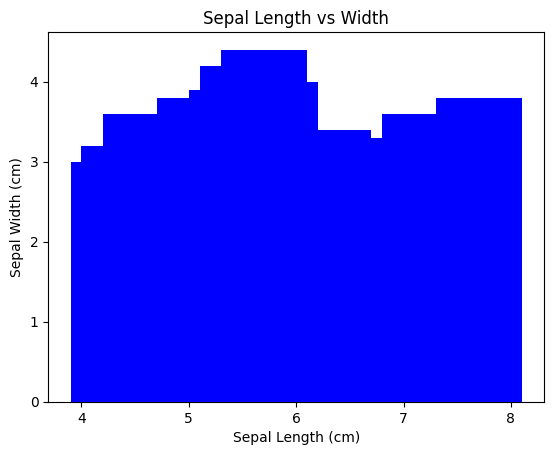

In [17]:
# Saving the model
joblib.dump(model,"iris_predictor.pkl")
joblib.dump(accuracy, "model_accuracy.pkl")
# Plot before scaling
plt.bar(X_train_unscaled['sepal length (cm)'], X_train_unscaled['sepal width (cm)'], color='blue', label='Iris')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Width')
plt.show()
